# Credit Card Fraud Detection

**Context:** It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content:** The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data is not provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Data Source:** https://www.kaggle.com/mlg-ulb/creditcardfraud/home

# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing The Dataset

In [2]:
ds = pd.read_csv('creditcard.csv')

# Taking Care Of Missing Data

In [3]:
# We observe no missing data, we therefore move onto the next steps.

ds.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Visualising The Dataset

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
ds.shape

(284807, 31)

In [6]:
ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Note:** From the below bar chart and value count, we see that the number of fraud (class = 1) is disproportionality low compared to not fraud (class = 0). We must bear this in mind when we are evaluating the accuracy of the models produced using the confusion matrix. This is because, as the number of fraud is very low, we may get a very high accuracy from the confusion matrix. This however will be misleading.

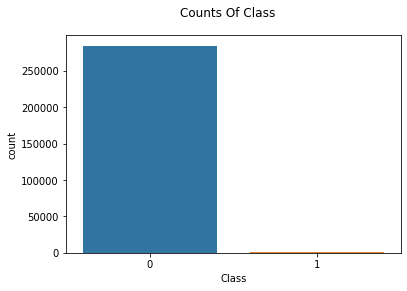

In [7]:
# Countplot of Class
plt.suptitle('Counts Of Class')
sns.countplot(ds.Class)
plt.show()

In [8]:
ds.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

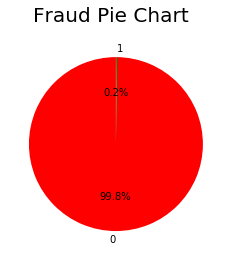

In [9]:
# Pie Chart for Fraud

plt.suptitle('Fraud Pie Chart', fontsize = 20)
plt.pie([ds[ds['Class'] == 0]['Class'].count(), ds[ds['Class'] == 1]['Class'].count()],
            labels = ['0','1'], colors = ['r','g'], startangle = 90, autopct='%.1f%%')
plt.show()

# Correlation Plot

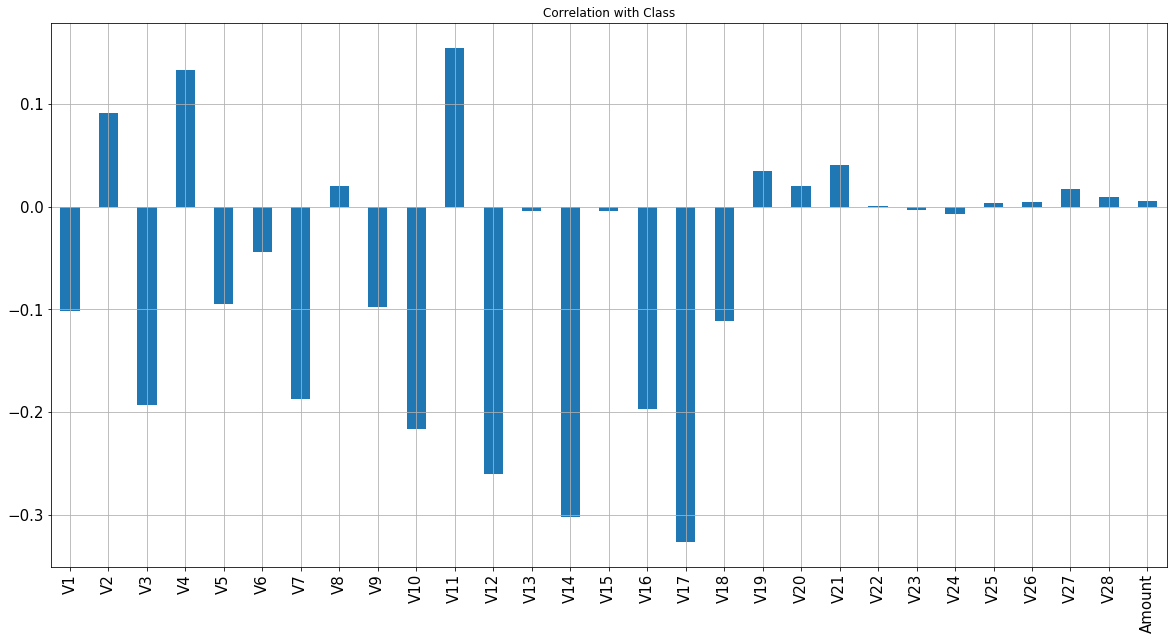

In [10]:
# Example observations/interpretations

# The lower V1, V3, V7, V10, V12, V14, V16 and V17 are, the higher the probability of fraud (and vice versa).
# The higher V2, V4 and V11 are, the higher the probability of fraud.

ds.drop(columns = ['Class','Time']).corrwith(ds.Class).plot.bar(
        figsize = (20,10), title = 'Correlation with Class', fontsize = 15, rot = 90, grid = True)

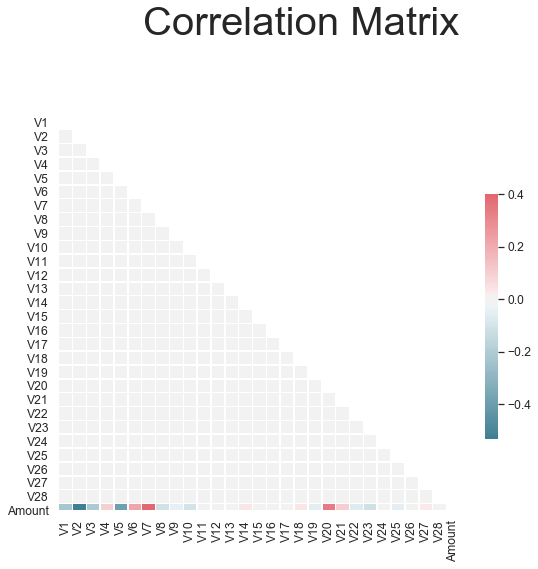

In [11]:
# Correlation matrix of independent variables

sns.set(style = 'white', font_scale = 1.1) # Builds the background

# Compute the correlation matrix
corr = ds.drop(columns = ['Class','Time']).corr() # Creating a 2D array of each correlation feature to each other

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True # This creates a the lower diagonal of the matrix as it is symmetrical

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize = (9,9)) # Size of the plot
fig.suptitle("Correlation Matrix", fontsize = 40) # Title

# Generate a custom diverging colourmap

cmap = sns.diverging_palette(220, 10, as_cmap = True) # Colouring

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.4, center = 0, 
            square = True, linewidth = 0.5, cbar_kws = {'shrink': 0.5})

# The only correlation between variables appears to be with the Amount.

# Encoding Categorical Variables

In [12]:
# We observe no categorical variables, we therefore move onto the next steps.

# Splitting The Dataset Into The Training Set and Test Set

In [13]:
X = ds.drop(columns = ['Class','Time'])
y = ds.Class

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Scaling

**Note:** This is a compulsory step because there will be a high volume of computations due to the ANN, making this highly computationally intensive. Feature Scaling will therefore ease the calculations.

**Note:** The Standard Scaler returns a numpy array of multiple dimensions. The problem with this process is that it loses the column names and index. The index is how we identify each set of fields to the user, and we would like the column names to be built within our model. We therefore save the scaled part into a different data frame by converting the result of the Standard Scaler into its data frame.

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [15]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [16]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [17]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [18]:
X_train = X_train2
X_test = X_test2

In [19]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,-0.067419,0.066209,-0.427936,-0.703358,1.326641,1.310295,0.405967,0.523780,0.015398,-0.333149,...,-0.081846,-0.084033,0.007304,0.400190,-4.075975,-1.707847,0.700556,0.764065,0.230267,-0.165692
204520,1.082570,0.010195,-0.997703,0.080656,0.438362,-0.250646,0.163260,-0.216420,0.348360,0.025064,...,-0.112308,-0.443008,-1.083154,0.425957,0.108640,-0.261294,0.423242,-0.170159,-0.177600,-0.352239
182659,-0.044312,0.101926,1.038206,0.484460,0.163547,0.830015,1.285435,-0.904559,0.692978,1.284152,...,0.068198,0.020632,1.461864,-0.652606,1.193401,-0.330270,-1.273134,-2.996064,-3.509166,0.330886
25117,0.688562,-0.321167,0.367027,-0.444613,-0.834837,-0.641813,-0.523043,-0.025306,-0.594087,0.565382,...,-0.087169,-0.019907,-0.247870,0.283512,0.573864,0.290527,-0.839004,0.034343,0.049675,-0.336067
227642,-0.777711,0.392471,0.406750,-0.396458,0.612566,-0.386884,0.803575,-0.078732,-0.057029,-0.947040,...,-0.095765,-0.297961,-0.540302,-0.341308,0.971565,1.303022,1.076139,0.162199,0.453377,0.005211


In [20]:
X_train.shape

(199364, 29)

In [21]:
X_test.shape

(85443, 29)

# Fitting The Artificial Neural Network To The Dataset

In [22]:
# Importing the libraries

import keras # Keras wraps Theano and Tensorflow libraries together.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [23]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu', init = 'uniform'),
    Dense(units = 24, activation = 'relu', init = 'uniform'),
    Dropout(0.5),
    Dense(units = 20, activation = 'relu', init = 'uniform'),
    Dense(units = 24, activation = 'relu', init = 'uniform'),
    Dense(units = 1, activation = 'sigmoid', init = 'uniform')
])

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [25]:
# Compiling the ANN
# Optimizer = 'adam': The algorithm used to find the optimal set of weights in the ANN.
# Loss: The loss function within the stochastic gradient descent algorithm (within the adam algorithm).
# Loss = 'binary_crossentropy': Binary outcomes
# Loss = 'categorical_crossentropy': Three or more categories.
# metrics = 'accuracy': The criterion we use to evaluate our model.

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 25s 124us/step - loss: 0.0085 - accuracy: 0.9988
Epoch 2/5
199364/199364 [==============================] - 24s 122us/step - loss: 0.0043 - accuracy: 0.9994
Epoch 3/5
199364/199364 [==============================] - 24s 122us/step - loss: 0.0039 - accuracy: 0.9994
Epoch 4/5
199364/199364 [==============================] - 25s 127us/step - loss: 0.0038 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 26s 132us/step - loss: 0.0036 - accuracy: 0.9994


In [26]:
# Predicting the test set results

y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [27]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Model Evaluation

In [28]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 17us/step


In [29]:
# From the below, we observe that we have achieved 99.94% accuracy in our model.
print(score)

[0.0033960980691473876, 0.9994031190872192]


# Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[85274    22]
 [   29   118]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.80      0.82       147

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [32]:
accuracy_score(y_test, y_pred)

0.999403110845827

In [33]:
# This is a function of precision_score and recall_score, and it balances them out.
f1_score(y_test, y_pred)

0.8222996515679442

In [34]:
# (True Positives)/(True Positives + False Positives)
# Of all the positives predicted, how many of them are correct.

precision_score(y_test, y_pred)

0.8428571428571429

In [35]:
# (True Positives)/(True Positives + False Negatives)
# Of all the positives that truly exist (Frauds), how many did we predict as true.
# Moreover the confusion matrix, this metric gives us a clearer picture of the reliabilty of the model.
# This is due to Fraud transactions potentially having devastating consequences to people.

recall_score(y_test, y_pred)

0.8027210884353742

In [36]:
# Specificity

print(cm[0,0]/(cm[0,0] + cm[1,0]))

0.9996600354032097


In [37]:
# Predicting for the whole dataset

X = ds.drop(columns = ['Class','Time'])
y = ds.Class

y_pred = model.predict(X)
y_pred = y_pred > 0.5
y_expected = y
cm_all = confusion_matrix(y_expected, y_pred)
print(cm_all)

[[284284     31]
 [   273    219]]


# Balancing The Dataset

In [38]:
X_ds = ds.drop(columns = ['Time','Class'])
y_ds = ds.Class

In [39]:
X_ds.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [40]:
y_ds.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X_ds = StandardScaler()

X_ds_scaled = pd.DataFrame(sc_X_ds.fit_transform(X_ds))

In [42]:
X_ds_scaled.columns = X_ds.columns.values
X_ds_scaled.index = X_ds.index.values

In [43]:
X_ds.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [44]:
X_ds_scaled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,4.000715,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,-0.896292,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,-0.445225,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,-0.366558,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


# Undersampling

In [45]:
fraud_indices = np.array(ds[ds.Class == 1].index)
fraud_count = len(fraud_indices)
print(fraud_count)

492


In [46]:
type(fraud_indices)

numpy.ndarray

In [47]:
not_fraud_indices = ds[ds.Class == 0].index
print(len(not_fraud_indices))

284315


In [48]:
import random
random.seed(0)

In [49]:
random_not_fraud_indices = np.random.choice(not_fraud_indices, size = fraud_count, replace = False)
random_not_fraud_indices = np.asarray(random_not_fraud_indices)
print(len(random_not_fraud_indices))

492


In [50]:
undersampling_indices = np.concatenate([fraud_indices, random_not_fraud_indices])
print(len(undersampling_indices))

984


In [51]:
under_sample_data = ds.loc[undersampling_indices, :]

In [52]:
under_sample_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41357,40648.0,-1.825014,-4.993696,-0.189945,2.385365,-2.613531,0.878926,0.928945,0.103313,0.504453,...,1.224577,0.093147,-1.314878,0.263500,-0.385377,-0.391447,-0.207192,0.287554,1500.00,0
210385,137958.0,1.854299,-0.804771,-0.360653,0.307561,-1.054221,-0.612821,-0.659577,0.017778,1.736695,...,0.208613,0.642849,0.102294,-0.006852,-0.260221,0.126185,-0.002983,-0.033980,74.95,0
163976,116360.0,0.601129,0.356987,-0.510714,1.289622,0.106832,-0.735212,0.519255,-1.168792,-0.224173,...,1.173542,0.757944,-0.237127,0.064808,0.111113,-0.353740,0.306467,0.371193,135.86,0
244940,152544.0,-0.062028,0.913199,-1.047768,-0.214290,0.241072,-0.918998,0.507371,0.391584,-0.147832,...,0.369838,0.862188,-0.075964,-0.469764,-0.393814,-0.146159,-0.034206,0.022906,42.81,0


In [53]:
under_sample_data.shape

(984, 31)

In [54]:
under_sample_data.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

# Splitting The Dataset Into The Training Set And Test Set

In [55]:
X = under_sample_data.drop(columns = ['Class','Time'])
y = under_sample_data.Class

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [57]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [58]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [59]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [60]:
X_train = X_train2
X_test = X_test2

In [61]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6870,0.097919,0.438841,-0.163548,0.178571,-0.138751,-0.897668,-0.278711,0.267664,-0.073018,-0.959436,...,0.163835,0.066132,-0.431794,0.051063,0.226166,0.039451,0.572728,0.351365,0.406875,-0.380615
184192,0.375116,-0.270579,0.727125,-1.118740,0.518312,0.038660,0.753666,-0.448771,0.952512,0.652654,...,-0.506676,0.094789,0.195305,0.081837,0.049967,-1.602100,-0.538454,-0.693432,-1.032664,-0.254963
152952,0.358675,-0.110059,0.527310,-0.172935,1.296611,2.816321,0.654237,-0.020243,0.565185,0.944671,...,-0.328299,-0.296977,-0.574391,0.176358,1.056336,-1.736760,-1.355283,-0.860753,-0.482475,-0.350410
214775,0.369537,-0.655319,0.250008,-0.768095,0.821194,-0.396885,0.483380,-0.304995,0.899381,0.705668,...,-1.081934,0.326207,1.926577,0.211026,1.431870,-1.325838,-0.460970,0.283895,0.018107,-0.381700
149145,-0.002320,0.515949,0.194529,-0.273838,0.460839,1.463139,-0.068498,-2.382287,2.049596,0.740805,...,-2.080564,3.488676,-2.145503,1.398764,0.307966,-2.292208,-1.472586,-0.278045,-0.357981,-0.359650


In [62]:
y_train

6870      1
184192    0
152952    0
214775    1
149145    1
         ..
48101     0
79536     1
247056    0
187676    0
208217    0
Name: Class, Length: 688, dtype: int64

In [63]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Fitting The Artificial Neural Network To The Dataset

In [64]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu', init = 'uniform'),
    Dense(units = 24, activation = 'relu', init = 'uniform'),
    Dropout(0.5),
    Dense(units = 20, activation = 'relu', init = 'uniform'),
    Dense(units = 24, activation = 'relu', init = 'uniform'),
    Dense(units = 1, activation = 'sigmoid', init = 'uniform')
])

In [65]:
# Compiling the ANN
# Optimizer = 'adam': The algorithm used to find the optimal set of weights in the ANN.
# Loss: The loss function within the stochastic gradient descent algorithm (within the adam algorithm).
# Loss = 'binary_crossentropy': Binary outcomes
# Loss = 'categorical_crossentropy': Three or more categories.
# metrics = 'accuracy': The criterion we use to evaluate our model.

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
688/688 [==============================] - 0s 601us/step - loss: 0.6926 - accuracy: 0.5581
Epoch 2/5
688/688 [==============================] - 0s 128us/step - loss: 0.5952 - accuracy: 0.8881
Epoch 3/5
688/688 [==============================] - 0s 125us/step - loss: 0.2871 - accuracy: 0.9012
Epoch 4/5
688/688 [==============================] - 0s 129us/step - loss: 0.2262 - accuracy: 0.9201
Epoch 5/5
688/688 [==============================] - 0s 125us/step - loss: 0.2036 - accuracy: 0.9288


In [66]:
# Predicting the test set results

y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

# Model Evaluation

In [67]:
score = model.evaluate(X_test, y_test)

296/296 [==============================] - 0s 233us/step


In [68]:
# From the below, we observe that we have achieved 99.94% accuracy in our model.
print(score)

[0.17701289541012533, 0.9358108043670654]


# Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[148   1]
 [ 18 129]]


In [70]:
# This is a function of precision_score and recall_score, and it balances them out.
f1_score(y_test, y_pred)

0.9314079422382673

In [71]:
# (True Positives)/(True Positives + False Positives)
# Of all the positives predicted, how many of them are correct.

precision_score(y_test, y_pred)

0.9923076923076923

In [72]:
# (True Positives)/(True Positives + False Negatives)
# Of all the positives that truly exist (Frauds), how many did we predict as true.
# Moreover the confusion matrix, this metric gives us a clearer picture of the reliabilty of the model.
# This is due to Fraud transactions potentially having devastating consequences to people.

recall_score(y_test, y_pred)

0.8775510204081632

In [73]:
# Predicting for the whole dataset

X = X_ds_scaled
y = ds.Class

y_pred = model.predict(X)
y_pred = y_pred > 0.5
y_expected = y
cm_all = confusion_matrix(y_expected, y_pred)
print(cm_all)

[[ 15298 269017]
 [     0    492]]


In [74]:
accuracy_score(y_expected, y_pred)

0.05544105306400475

In [75]:
# (True Positives)/(True Positives + False Negatives)
# Of all the positives that truly exist (Frauds), how many did we predict as true.
# Moreover the confusion matrix, this metric gives us a clearer picture of the reliabilty of the model.
# This is due to Fraud transactions potentially having devastating consequences to people.

recall_score(y_expected, y_pred)

1.0

In [76]:
# (True Positives)/(True Positives + False Positives)
# Of all the positives predicted, how many of them are correct.

precision_score(y_expected, y_pred)

0.0018255420041631263

# SMOTE : Synthetic Minority Oversampling Technique

In [77]:
%%bash
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /Users/mohitgoel/anaconda3/lib/python3.7/site-packages (0.7.0)


In [78]:
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())

y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [79]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Fitting The Artificial Neural Network To The Dataset

In [80]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu', init = 'uniform'),
    Dense(units = 24, activation = 'relu', init = 'uniform'),
    Dropout(0.5),
    Dense(units = 20, activation = 'relu', init = 'uniform'),
    Dense(units = 24, activation = 'relu', init = 'uniform'),
    Dense(units = 1, activation = 'sigmoid', init = 'uniform')
])

In [81]:
# Compiling the ANN
# Optimizer = 'adam': The algorithm used to find the optimal set of weights in the ANN.
# Loss: The loss function within the stochastic gradient descent algorithm (within the adam algorithm).
# Loss = 'binary_crossentropy': Binary outcomes
# Loss = 'categorical_crossentropy': Three or more categories.
# metrics = 'accuracy': The criterion we use to evaluate our model.

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
398041/398041 [==============================] - 52s 129us/step - loss: 0.0467 - accuracy: 0.9836s - loss: 0.0
Epoch 2/5
398041/398041 [==============================] - 51s 128us/step - loss: 0.0243 - accuracy: 0.9926
Epoch 3/5
398041/398041 [==============================] - 51s 129us/step - loss: 0.0199 - accuracy: 0.9943
Epoch 4/5
398041/398041 [==============================] - 51s 127us/step - loss: 0.0181 - accuracy: 0.9949
Epoch 5/5
398041/398041 [==============================] - 51s 127us/step - loss: 0.0161 - accuracy: 0.9957


In [82]:
# Predicting the test set results

y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [83]:
score = model.evaluate(X_test, y_test)

170589/170589 [==============================] - 3s 18us/step


In [84]:
# From the below, we observe that we have achieved 99.94% accuracy in our model.
print(score)

[0.012624782326397474, 0.9970924258232117]


In [85]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84872   455]
 [   41 85221]]


In [86]:
# This is a function of precision_score and recall_score, and it balances them out.
f1_score(y_test, y_pred)

0.9970983631492121

In [87]:
# (True Positives)/(True Positives + False Positives)
# Of all the positives predicted, how many of them are correct.

precision_score(y_test, y_pred)

0.9946892945515664

In [88]:
# (True Positives)/(True Positives + False Negatives)
# Of all the positives that truly exist (Frauds), how many did we predict as true.
# Moreover the confusion matrix, this metric gives us a clearer picture of the reliabilty of the model.
# This is due to Fraud transactions potentially having devastating consequences to people.

recall_score(y_test, y_pred)

0.9995191292721259

In [89]:
# Predicting for the whole dataset

X = X_ds_scaled
y = ds.Class

y_pred = model.predict(X)
y_pred = y_pred > 0.5
y_expected = y
cm_all = confusion_matrix(y_expected, y_pred)
print(cm_all)

[[282907   1408]
 [     0    492]]


In [90]:
accuracy_score(y_expected, y_pred)

0.9950563012847297

In [91]:
# (True Positives)/(True Positives + False Negatives)
# Of all the positives that truly exist (Frauds), how many did we predict as true.
# Moreover the confusion matrix, this metric gives us a clearer picture of the reliabilty of the model.
# This is due to Fraud transactions potentially having devastating consequences to people.

recall_score(y_expected, y_pred)

1.0

In [92]:
# (True Positives)/(True Positives + False Positives)
# Of all the positives predicted, how many of them are correct.

precision_score(y_expected, y_pred)

0.25894736842105265